In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\admin\Desktop\covid-19-main\data\Countiresdataset.csv")
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,22-03-2020,Afghanistan,78,21,11
1,23-03-2020,India,40,1,1
2,24-03-2020,India,42,1,1
3,25-03-2020,India,74,2,1
4,26-03-2020,USA,80,2,2


Text(0, 0.5, 'Deaths')

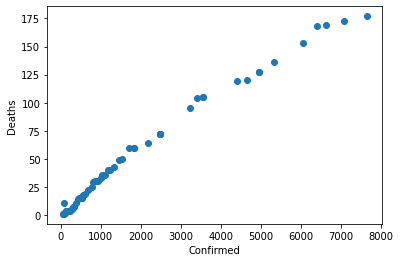

In [4]:
plt.scatter(df.Confirmed,df['Deaths'])
plt.xlabel('Confirmed')
plt.ylabel('Deaths')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Confirmed','Deaths']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
df['cluster']=y_predicted
df.head()

,Date,Country,Confirmed,Recovered,Deaths,cluster
0,22-03-2020,Afghanistan,78,21,11,0
1,23-03-2020,India,40,1,1,0
2,24-03-2020,India,42,1,1,0
3,25-03-2020,India,74,2,1,0
4,26-03-2020,USA,80,2,2,0


In [7]:
km.cluster_centers_

array([[ 559.45945946,   17.94594595],
       [5815.6       ,  146.9       ],
       [2595.5       ,   78.41666667]])

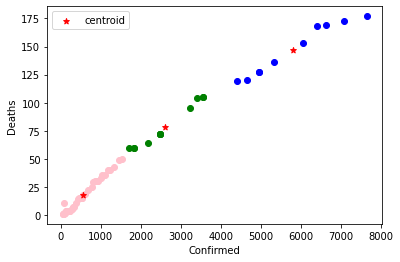

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Confirmed,df1['Deaths'],color='pink')
plt.scatter(df2.Confirmed,df2['Deaths'],color='blue')
plt.scatter(df3.Confirmed,df3['Deaths'],color='green')
plt.scatter(km.cluster_centers_[:,0,],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.legend()

In [9]:
scaler = MinMaxScaler()

scaler.fit(df[['Deaths']])
df['Deaths'] = scaler.transform(df[['Deaths']])

scaler.fit(df[['Confirmed']])
df['Confirmed'] = scaler.transform(df[['Confirmed']])

In [10]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,cluster
0,22-03-2020,Afghanistan,0.004990,21,0.056818,0
1,23-03-2020,India,0.000000,1,0.000000,0
2,24-03-2020,India,0.000263,1,0.000000,0
3,25-03-2020,India,0.004465,2,0.000000,0
4,26-03-2020,USA,0.005253,2,0.005682,0


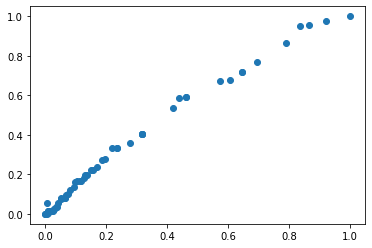

In [11]:
plt.scatter(df.Confirmed,df['Deaths'])

In [12]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Confirmed',"Deaths"]])
y_predicted

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1])

In [13]:
df['cluster']=y_predicted
df.head()

,Date,Country,Confirmed,Recovered,Deaths,cluster
0,22-03-2020,Afghanistan,0.004990,21,0.056818,4
1,23-03-2020,India,0.000000,1,0.000000,4
2,24-03-2020,India,0.000263,1,0.000000,4
3,25-03-2020,India,0.004465,2,0.000000,4
4,26-03-2020,USA,0.005253,2,0.005682,4


In [14]:
km.cluster_centers_

array([[0.13314886, 0.19439935],
       [0.8829153 , 0.94886364],
       [0.55039031, 0.64962121],
       [0.28043336, 0.37215909],
       [0.02869051, 0.03656126]])

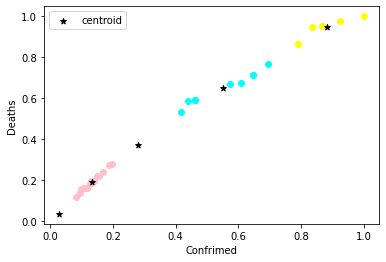

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Confirmed,df1['Deaths'],color='pink')
plt.scatter(df2.Confirmed,df2['Deaths'],color='yellow')
plt.scatter(df3.Confirmed,df3['Deaths'],color='cyan')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            color='black',marker='*',label='centroid')
plt.xlabel('Confrimed')
plt.ylabel('Deaths')
plt.legend()

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Confirmed','Deaths']])
    sse.append(km.inertia_)

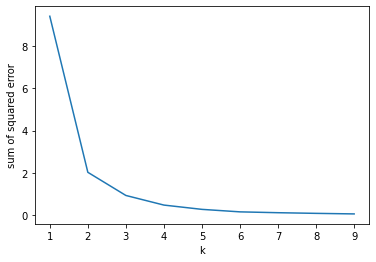

In [17]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)